In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torchvision import datasets, models
from torchsummary import summary
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from datetime import datetime
from pathlib import Path
from PIL import Image
from google.colab import files
from random import randrange
from skimage.transform import resize
from torch import Tensor

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

In [4]:
Test_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

In [5]:
DATA_DIR = r'../content/drive/MyDrive/NEW DS'

In [6]:
# Get filepaths and labels
image_dir = Path(DATA_DIR)
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

label_encoder = {'nerva': 0, 'hadrian': 1, 'titus': 2, 'trajan': 3, 'antoninus': 4, 'lucius': 5, 'vespasian': 6, 'domitian': 7, 'marcus': 8}

print(label_encoder)
# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)
image_df.replace(label_encoder,inplace=True)


{'nerva': 0, 'hadrian': 1, 'titus': 2, 'trajan': 3, 'antoninus': 4, 'lucius': 5, 'vespasian': 6, 'domitian': 7, 'marcus': 8}


In [12]:
data, labels = image_df.Filepath, image_df.Label

In [8]:
model = models.resnet18()
in_featuers = model.fc.in_features
model.fc = nn.Linear(in_featuers, 9)
state_dict = torch.load('/content/drive/MyDrive/Colab Notebooks/emp_model_cpoint_256_low_rotation_100.pth',map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

<All keys matched successfully>

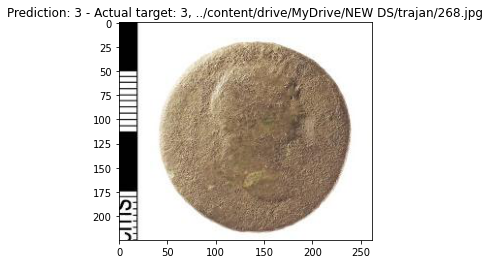

torch.return_types.topk(values=tensor([[0.8830]]), indices=tensor([[3]]))

In [65]:
row = randrange(len(image_df))
image_path = data.iloc[row]
Imagee =  Image.open(str(image_path))
image = Test_transform(Imagee)
image = image.reshape(1,3, 256, 256)

label= labels.iloc[row]


with torch.no_grad():
    model.eval()
    output = model.forward(image)
    _, y_hat = output.max(1)
    predicted_idx = str(y_hat.item())
    plt.imshow(Imagee, cmap='gray',)
    plt.title(f'Prediction: {predicted_idx} - Actual target: {label}, {image_path}')
    plt.show()
p = F.softmax(output, dim=1)
p.topk(1, dim = 1)

In [30]:
p = F.softmax(output, dim=1)
p.topk(1, dim = 1)

torch.return_types.topk(values=tensor([[1.0000]]), indices=tensor([[5]]))